<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:
# load the csv file
life=pd.read_csv('Life_Expectancy.csv')

# type your code here
life.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


##### INFERENCE:-Loaded the first dataset LIFE EXPECTANCY and checked the first five observations

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
x=life['Adult_Mortality']#INDEPENDENT VARIABLE
y=life['Expected']#DEPENDENT(TARGET) VARIABLE
x.corr(y)

-0.7108678534954708

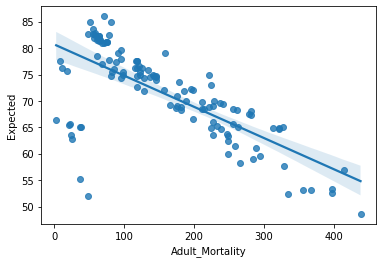

In [4]:
sns.regplot(x,y)
plt.show()

##### INFERENCE:-Adult mortality rate and life expectancy are Negatively Corealated

In [5]:
X=sm.add_constant(x)#beta not is added in Eqn,y=m(beta_1)x+c(beta_not)-by add_constant
print(X)
#MODEL BUILDING:-
olsmodel=sm.OLS(y,X).fit()#ols(y,X)-ordinary least square>constant-i.e feature-beta 1,2,..to add beta not by add_constant
olsmodel.summary()#Model

     const  Adult_Mortality
0      1.0              263
1      1.0                8
2      1.0               19
3      1.0              335
4      1.0              116
..     ...              ...
119    1.0               37
120    1.0              397
121    1.0               48
122    1.0              415
123    1.0              438

[124 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.27e-20
Time:                        16:00:41   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fstatistics is Equal to Zero(Fstats=0) and less than 0.05,Hence The Model is Significant and we can Use This Model.

##### INFERENCE:- For unit change in Adultmortatily(Independent Variable) Life Expectency (Dependent/Target Variable) tends to Decreasing by -0.059 Units.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
x=life['Income_Index']#Independent Variable
y=life['Expected']#Dependent(Target)Variable
X=sm.add_constant(x)#beta not by add_constant
print(X)
olsmodel= sm.OLS(y,X).fit()#ols(y,X)-ordinary least square>constant-i.e feature-beta 1,2,..to add beta not by add_constant
olsmodel.summary()#Model

     const  Income_Index
0      1.0         0.479
1      1.0         0.761
2      1.0         0.743
3      1.0         0.531
4      1.0         0.826
..     ...           ...
119    1.0         0.388
120    1.0         0.371
121    1.0         0.359
122    1.0         0.343
123    1.0         0.332

[124 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.13e-34
Time:                        16:00:41   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic is equal to Zero(F=0) and Less Than 0.05,Hence The Model is Significant and we can Use This Model.

##### INFERENCE:-For Unit Change In Human Development Index Life Expectancy is Increasing By 42.42 units.

In [7]:
#MODEL PREDICTION:-
ypred=olsmodel.predict()
ypred

array([62.24036288, 74.20401067, 73.44037358, 64.44642559, 76.96158906,
       73.35552501, 81.67068447, 79.76159173, 74.07673782, 76.83431621,
       66.31309404, 75.60401201, 75.77370914, 79.88886458, 71.87067511,
       62.32521145, 67.54339825, 73.61007071, 71.53128084, 73.90704069,
       78.57371181, 75.51916344, 65.59188123, 80.90704737, 56.64035753,
       58.63429883, 77.76765044, 73.05855503, 72.6343122 , 63.04642426,
       74.79795063, 76.83431621, 74.71310206, 78.14946898, 81.07674451,
       73.27067644, 71.10703801, 70.68279518, 78.53128753, 60.62824013,
       73.05855503, 79.80401602, 79.8464403 , 74.50098065, 81.11916879,
       66.31309404, 78.61613609, 68.94339958, 59.48278449, 62.70702999,
       77.30098332, 80.90704737, 68.01006536, 71.02218945, 74.75552635,
       69.45249098, 80.94947166, 80.01613743, 79.29492462, 72.84643361,
       80.18583456, 75.56158772, 65.25248697, 75.81613342, 74.28885923,
       60.03430017, 79.93128887, 63.59793993, 75.30704203, 71.65

In [8]:
# SSE = yactual - ypred
# SSR = ybar - ypred
# SSR = yacctual - ybar
sse=np.sum((y-ypred)**2) # SSE = yactual - ypred
print('The Sum Of Squared Error(SSE) is:',round(sse))

The Sum Of Squared Error(SSE) is: 2550.0


In [9]:
mse=sse/len(y)
print('The MEAN SQUARED ERROR (MSE) is:',round(mse))

The MEAN SQUARED ERROR (MSE) is: 21.0


In [10]:
rmse = np.sqrt(mse)
print('ROOT MEAN SQUARED ERROR is:',round(rmse))#manual rmse

ROOT MEAN SQUARED ERROR is: 5.0


In [11]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y,ypred,squared=False)
print('ROOT MEAN SQUARED ERROR is:',round(rmse))#rmse

ROOT MEAN SQUARED ERROR is: 5.0


##### INFERENCE:-The Expected Error value is 5 From RMSE

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
x=life[['Hepatitis ','Polio','Diphtheria ']]#INDEPENDENT VARIABLE
y=life['Expected']#DEPENDENT(TARGET)VARIABLE
X=sm.add_constant(x)#ADDING IN THE EQUATION y=mx+c
olsmodel=sm.OLS(y,X).fit()#Model Building
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           0.000468
Time:                        16:00:41   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis      -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio           0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria      0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic=0.000468<0.05.Hence The Model is Significant and We can Use This Model

##### INFERENCE:- The immunization (Hepatitis,Polio,Diphtheria) do not contribute OverAll significance because Hepatitis,Diphtheria pval>0.05.Amoung the 3, lower p value is for polio(pval=0.038)<signifance value of 0.05.Hence it Indicates polio alone is bettert feat in immunization


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
life['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [14]:
life['Status'].nunique()

2

In [15]:
#categorical column-encoding:
status_dummies=pd.get_dummies(life['Status'],drop_first=True,prefix='Status')
status_dummies.head(10)

,Status_Developing
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,1


In [16]:
immun=life[['Hepatitis ','Polio','Diphtheria ']]
x=pd.concat([immun,status_dummies],axis=1)
x.head(10)

,Hepatitis,Polio,Diphtheria,Status_Developing
0,65,6,65,1
1,98,98,98,1
2,95,95,95,1
3,64,7,64,1
4,94,93,94,1
5,94,96,94,1
6,93,93,93,0
7,93,93,93,0
8,96,98,96,1
9,98,98,98,1


In [17]:
y=life['Expected']
X=sm.add_constant(x)
olsmodel=sm.OLS(y,X).fit()#MODEL
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.00e-09
Time:                        16:00:41   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
Status_Developing   -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistics is Equal to Zero and less than 0.05.Hence Model is Significant and We can Use This Model.

##### INFERENCE:-Status feature addition has better impacted by Increased Adjusted R_square value.But Fetures like Hepatitis(tstats=0.955) and Diphtheria's(tstats=0.548) pval>0.05  increased comparing the last previous observation hence these Feature become insignificant


<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
status_dummies=pd.get_dummies(life['Status'],drop_first=True,prefix='Status')
status_dummies.head(10)

,Status_Developing
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,1


In [19]:
x1=life[['Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling']]

In [20]:
x=pd.concat([x1,status_dummies],axis=1)
y=life['Expected']
X=sm.add_constant(x)
olsmodel=sm.OLS(y,X).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.94e-36
Time:                        16:00:41   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality       -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths          0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis              0.0656      0.032      2.056      0.042       0.002       0.129
Measles             -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
 BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths      -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                 -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria            -0.0345      0.040     -0.868      0.387      -0.113       0.044
 HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                 5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population         -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19     -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9        0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index          18.6518      6.313      2.955      0.004       6.138      31.166
Schooling              0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing     -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistics is Equal to Zero and less than 0.05.Hence Model is Significant and We can Use This Model.

##### INFERENCE:-Adult_Mortality,Hepatitis,HIV,POPULATION,ICOME_INDEX have (tStats)Pvalue<0.05,This Are The Significant Variable.

##### INFERENCE:-

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
x=life[['GDP','Income_Index']]
y=life['Expected']
X=sm.add_constant(x)
olsmodel=sm.OLS(y,X).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.44e-33
Time:                        16:00:41   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848      0.000      38.921      46.306
GDP           4.515e-05   4.36e-05      1.034      0.303   -4.13e-05       0.000
Income_Index    40.9705      2.823     14.512      0.000      35.381      46.560
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.954
Skew:                           0.232   Prob(JB):                     0.000208
Kurtosis:                       4.751   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fstatistics is Equal to Zero and less than 0.05,Hence The Model is Significant and we can Use This Model.

In [22]:
#SST=y-y_bar
sst=np.sum((y-y.mean())**2)
print('The Total variation for the observed values of life expectancy is:',sst)

The Total variation for the observed values of life expectancy is: 8819.80548387097


##### INFERENCE:-The total variation for the observed values of life expectancy is 8819.81

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
x=life['Income_Index']
y=life['Expected']
X=sm.add_constant(x)
olsmodel=sm.OLS(y,X).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.13e-34
Time:                        16:00:41   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fstatistics is Equal to Zero and less than 0.05,Hence The Model is Significant and we can Use This Model.

##### Inference:-The lower bound and upper bound for estimated value of life expectancy per unit in HDI is 37.576 and 47.273


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
x=life[['Adult_Mortality','Infant_Deaths','Population']]
y=life['Expected']
X=sm.add_constant(x)
olsmodel=sm.OLS(y,X).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     42.57
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           8.27e-19
Time:                        16:00:41   Log-Likelihood:                -395.41
No. Observations:                 124   AIC:                             798.8
Df Residuals:                     120   BIC:                             810.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.6261      1.018     79.188      0.000      78.610      82.642
Adult_Mortality    -0.0580      0.005    -10.760      0.000      -0.069      -0.047
Infant_Deaths      -0.0086      0.006     -1.489      0.139      -0.020       0.003
Population       7.514e-09   1.32e-08      0.570      0.570   -1.86e-08    3.36e-08
==============================================================================
Omnibus:                       58.408   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.583
Skew:                          -1.840   Prob(JB):                     1.11e-36
Kurtosis:                       7.301   Cond. No.                     8.61e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fstatistics is Equal to Zero and less than 0.05,Hence The Model is Significant and we can Use This Model.

##### INFERENCE:-Among Adult_Mortality,Infant_Deaths,Population.Only the Adult_Mortality have (tstats)Pvalue=0 which is less than 0.05(pval<0.05) others  like Infant_Deaths(Pval=0.139>0.05),Population(Pval=0.570>0.05) have Pval>0.05 both are not useful.Hence,Only Adult_Mortality feature will help for better prediction

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
life.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [26]:
# type your code here
x=life[['Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling']]
y=life['Expected']
X=sm.add_constant(x)
olsmodel=sm.OLS(y,X).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     38.99
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.32e-36
Time:                        16:00:41   Log-Likelihood:                -325.11
No. Observations:                 124   AIC:                             682.2
Df Residuals:                     108   BIC:                             727.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.6186      3.212     17.628      0.000      50.252      62.985
Adult_Mortality       -0.0239      0.004     -5.888      0.000      -0.032      -0.016
Infant_Deaths          0.0556      0.037      1.493      0.138      -0.018       0.129
Hepatitis              0.0547      0.032      1.734      0.086      -0.008       0.117
Measles            -7.078e-05   6.11e-05     -1.158      0.249      -0.000    5.04e-05
 BMI                  -0.0324      0.023     -1.438      0.153      -0.077       0.012
Underfive_Deaths      -0.0378      0.027     -1.386      0.169      -0.092       0.016
Polio                 -0.0128      0.022     -0.581      0.562      -0.056       0.031
Diphtheria            -0.0240      0.040     -0.605      0.546      -0.103       0.055
 HIV                  -0.9367      0.264     -3.553      0.001      -1.459      -0.414
GDP                 5.389e-05    3.5e-05      1.539      0.127   -1.55e-05       0.000
Population         -2.007e-08   8.63e-09     -2.326      0.022   -3.72e-08   -2.97e-09
Malnourished10_19     -0.5490      0.301     -1.825      0.071      -1.145       0.047
Malnourished5_9        0.3450      0.285      1.213      0.228      -0.219       0.909
Income_Index          18.7230      6.372      2.938      0.004       6.093      31.353
Schooling              0.5395      0.333      1.618      0.109      -0.121       1.200
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.040   Jarque-Bera (JB):               10.884
Skew:                           0.015   Prob(JB):                      0.00433
Kurtosis:                       4.451   Cond. No.                     9.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fstatistics is Equal to Zero and less than 0.05,Hence The Model is Significant and we can Use This Model.

##### INFERENCE:- tstats of Adult Mortality(PVALUE=0),HIV(PVALUE=0.01),Population(PVALUE=0.22),Income_Index(PVALUE=0.004) THIS FEATURES HAVE PVALUE LESS THAN 0.05,HENCE THEY ARE SIGNIFICANT FOR THE MODEL.OTHER FEATURES CAN BE REMOVED FROM THE MODEL

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

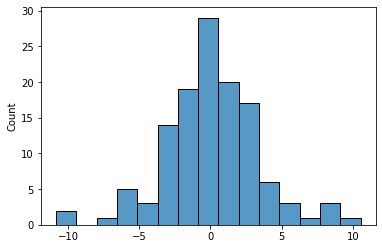

In [27]:
# type your code here
sns.histplot(olsmodel.resid)
plt.show()

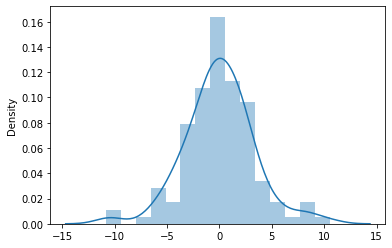

In [28]:
sns.distplot(olsmodel.resid)
plt.show()

DATA IS LEFT SKEWED,HENCE IT IS NOT NORMAL DISTRIBUTED

In [29]:
#NORMALITY TEST BY SHAPIRO WILK
#Ho:SKEW=0
#Ha:SKEW!=0
from scipy.stats import shapiro
shapiro(olsmodel.resid)

(0.9769343137741089, 0.03203512728214264)

Pvalue=0.03<sign level=0.05.Hence H0 is Rejected,Ha is Selected which means Data is not Normally Distributed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
status_dummies=pd.get_dummies(life['Status'],drop_first=True,prefix='Status')
status_dummies.head(10)

,Status_Developing
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,1


In [31]:
x=life[['GDP']]
x=pd.concat([x,status_dummies],axis=1)
x.head(10)

,GDP,Status_Developing
0,584.259210,1
1,4575.763787,1
2,4132.762920,1
3,3695.793748,1
4,13467.123600,1
5,369.654776,1
6,56554.387600,0
7,43665.947000,0
8,55.313820,1
9,22688.878240,1


In [32]:
# type your code here

y=life['Expected']
X=sm.add_constant(x)
olsmodel=sm.OLS(y,X).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     32.20
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           6.13e-12
Time:                        16:00:42   Log-Likelihood:                -413.89
No. Observations:                 124   AIC:                             833.8
Df Residuals:                     121   BIC:                             842.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                77.1415      1.845     41.814      0.000      73.489      80.794
GDP                   0.0003   6.08e-05      4.228      0.000       0.000       0.000
Status_Developing    -9.0771      1.830     -4.959      0.000     -12.701      -5.453
==============================================================================
Omnibus:                        6.257   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.164
Skew:                          -0.546   Prob(JB):                       0.0459
Kurtosis:                       3.036   Cond. No.                     5.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic=0<0.05.HENCE THE MODEL IS SIGNIFICANT AND HENCE WE CAN USE THIS MODEL

###### INFERENCE:-TSTATS(Pvalue) OF status of the country and its GDP both are Equal to Zero and less than 0.05.Hence,YES the interaction of status of the country and its GDP have significant effect on life expectancy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
status_dummies=pd.get_dummies(life['Status'],drop_first=True,prefix='Status')
status_dummies.head(10)

,Status_Developing
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,1


In [34]:
x2=life[['Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling']]
x2.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
0,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2
2,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
3,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
4,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3


In [35]:
# type your code here
# full no-intecept model => we need to take only x not X
X=pd.concat([x2,status_dummies],axis=1)
ols_model_no_intercept=sm.OLS(y,X).fit()
ols_model_no_intercept.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                   4.84e-108
Time:                        16:00:42   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths         -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis              0.0305      0.058      0.523      0.602      -0.085       0.146
Measles               -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
 BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths       0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                  0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria             0.0388      0.073      0.535      0.593      -0.105       0.183
 HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP                -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population         -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19     -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9        1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index          43.2384     11.241      3.846      0.000      20.956      65.520
Schooling              2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing      7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic=0 and less than 0.05.Model is Significanct,Hence We can use this model.

FEATURES LIKE Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_Developing have tstats Pval=0<0.05.Hence This variables are only Significant for Model With No intercept and we can Remove Other Variables in the Model.

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [36]:
# load the csv file
fev=pd.read_csv('FEV_data.csv')
# type your code here
fev.head()

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.0,F,smoker,1.708
1,17,167.5,F,smoker,1.724
2,19,154.5,F,smoker,1.720
3,16,163.0,M,smoker,1.558
4,16,157.0,M,smoker,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here
x=fev[['Age','Height (cm)','FEV']]
x.corr()

,Age,Height (cm),FEV
Age,1.000000,0.164519,0.142240
Height (cm),0.164519,1.000000,0.828025
FEV,0.142240,0.828025,1.000000


##### INFERENCE:-Height (cm) has the highest impact on the FEV of a person

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here
fev['Smoke_habit'].unique()

array(['smoker', 'non-smoker'], dtype=object)

In [39]:
status_dummies=pd.get_dummies(fev['Smoke_habit'],drop_first=True,prefix='Smoke_habit')
status_dummies.head()

,Smoke_habit_smoker
0,1
1,1
2,1
3,1
4,1


In [40]:
x = status_dummies
x.head(2)

,Smoke_habit_smoker
0,1
1,1


In [41]:
y=fev['FEV']
X=sm.add_constant(x)
ols=sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     70.92
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.36e-16
Time:                        16:00:42   Log-Likelihood:                -800.43
No. Observations:                 654   AIC:                             1605.
Df Residuals:                     652   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4206      0.098     34.729      0.000       3.227       3.614
Smoke_habit_smoker    -0.8778      0.104     -8.422      0.000      -1.082      -0.673
==============================================================================
Omnibus:                       37.782   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.957
Skew:                           0.622   Prob(JB):                     4.70e-10
Kurtosis:                       3.167   Cond. No.                         5.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic=0 and less than 0.05.Model is Significanct,Hence We can use this model.

###### INFERENCE:-Smoke_habit_smoker tstats(pval=0)<0.05.Hence,Impact of smoking habit of a person on FEV is high

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here
num_col=fev.select_dtypes(exclude='object').drop(['FEV'],axis = 1)
cat_col=fev.select_dtypes(include='object')
cat_dummies=pd.get_dummies(cat_col,drop_first =True)
x=pd.concat([num_col,cat_dummies],axis = 1)
y=fev['FEV']
X=sm.add_constant(x)
fev_ols=sm.OLS(y,X).fit()
fev_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          2.78e-168
Time:                        16:00:42   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age                    0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)            0.1192      0.003     34.063      0.000       0.112       0.126
Sex_M                  0.1801      0.038      4.769      0.000       0.106       0.254
Smoke_habit_smoker    -0.2231      0.063     -3.515      0.000      -0.348      -0.098
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic=0 and less than 0.05.Model is Significanct,Hence We can use this model.

##### INFERENCE:-

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_fev=pd.DataFrame()
vif_fev['vif_factors'] =[vif(num_col.values,i) for i in range (num_col.shape[1])]
vif_fev['Features'] =num_col.columns
vif_fev

,vif_factors,Features
0,46.697651,Age
1,46.697651,Height (cm)


###### INFERENCE:-Variance Inflation Factors of Both Age and Height Are more than 1,Hence High MultiCollinearity

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
fev_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          2.78e-168
Time:                        16:00:42   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age                    0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)            0.1192      0.003     34.063      0.000       0.112       0.126
Sex_M                  0.1801      0.038      4.769      0.000       0.106       0.254
Smoke_habit_smoker    -0.2231      0.063     -3.515      0.000      -0.348      -0.098
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#AUTO CORRELATION FROM DUBIN-WATSON:-
# H0=0 : The error terms are not autocorrelated
# Ha!=0 : The error terms are auto correlated

#DUBIN-WATSON=1.647 >0,hence H0 is Rejected,Ha is selected which means The error terms are auto correlated
#AUTO CORRELATION FROM DUBIN-WATSON=1.647 IS BETWEEN 0-2 HENCE +VE CORRELATION 
#There is slight positive auto corrrelated 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
# shapiro-wilk test for normality check
#H0:SKEW=0
#Ha:SKEW!=0
from scipy.stats import shapiro
shapiro(fev_ols.resid)

(0.9544001817703247, 2.3786520171077685e-13)

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here

train,test=train_test_split(fev,test_size=0.70)
num_col = train.select_dtypes(exclude='object').drop(['FEV'],axis = 1)
cat_col = train.select_dtypes(include='object')
cat_dummies=pd.get_dummies(cat_col,drop_first = True)
x=pd.concat([num_col,cat_dummies],axis = 1)
y=train['FEV']
X=sm.add_constant(x)
fev_ols=sm.OLS(y,X).fit()
fev_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     93.33
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           7.51e-44
Time:                        16:00:42   Log-Likelihood:                -142.41
No. Observations:                 196   AIC:                             294.8
Df Residuals:                     191   BIC:                             311.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.2896      1.146    -14.220      0.000     -18.549     -14.030
Age                   -0.0128      0.014     -0.936      0.350      -0.040       0.014
Height (cm)            0.1188      0.007     17.010      0.000       0.105       0.133
Sex_M                  0.1580      0.076      2.088      0.038       0.009       0.307
Smoke_habit_smoker    -0.1248      0.123     -1.018      0.310      -0.367       0.117
==============================================================================
Omnibus:                       66.921   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.304
Skew:                          -1.024   Prob(JB):                    1.74e-118
Kurtosis:                      10.887   Cond. No.                     5.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
ypred=fev_ols.predict()
ypred

array([2.3694638 , 2.77784718, 2.30279892, 2.07255863, 2.99496919,
       3.20079826, 1.8405771 , 2.61981437, 2.17121041, 2.23059145,
       2.48822586, 3.74681233, 3.71511727, 3.12130694, 2.89106665,
       3.7954    , 3.28712317, 2.02679546, 3.38498354, 1.56457364,
       2.15759255, 3.86760748, 2.84451206, 2.8573385 , 2.42884483,
       3.4182121 , 3.9526414 , 3.29945004, 3.28791459, 1.69061955,
       2.40873455, 2.40873455, 1.40654083, 2.56043334, 2.80603273,
       3.49849484, 2.77784718, 2.54032305, 3.93506377, 3.7744983 ,
       2.97689199, 2.53002927, 3.1502839 , 3.3986014 , 3.57674449,
       2.0861765 , 2.60698793, 2.32290921, 2.02679546, 3.5065701 ,
       1.44581158, 2.46811558, 1.05025463, 2.73857644, 2.68727067,
       2.02600404, 2.42156099, 4.14361094, 2.02679546, 3.26017929,
       4.31621144, 2.87016495, 2.31008277, 2.39844076, 2.58687764,
       2.17121041, 2.64625868, 2.72575   , 4.07744564, 2.13748227,
       2.71846615, 3.04959904, 2.16091663, 2.81885917, 2.27967

In [49]:
#SSE = yactual - ypred
# SSR = ybar - ypred
# SSR = yacctual - ybar

sse = np.sum((y-ypred)**2)
sse

49.079723531169904

In [50]:
mse=sse/len(y)
print("Mean_Squared_Error:",mse)

Mean_Squared_Error: 0.25040675271005053


In [53]:
rmse=mean_squared_error(y,ypred,squared=False)
print('ROOT_MEAN_SQUARED_ERROR is:',rmse)

ROOT_MEAN_SQUARED_ERROR is: 0.5004065873967394


In [54]:
rmse = np.sqrt(mse)
print("Root_Mean_Squared_Error:",rmse)

Root_Mean_Squared_Error: 0.5004065873967394


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
MAE = np.sum(abs(y-ypred))
print('Mean absolute error:',MAE)

Mean absolute error: 69.76614748333341


In [56]:
MSP = np.sum(abs((y-ypred)/y))
print('Mean absolute Percentage:',MSP)

Mean absolute Percentage: 28.356001213129424


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
# type your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

dummies=pd.get_dummies(fev,drop_first=True)#get_dummies get only numerical data/categorical data will be splitted into numeric data
dummies#DONOT TREAT OUTLIERS/REDUCE THE VALUE BIN THEM INTO GROUPS
target_col='FEV'
input_cols=dummies.columns.drop(target_col)

train_x,test_x,train_y,test_y=train_test_split(dummies[input_cols],
                                              dummies[target_col],
                                              test_size=0.2,
                                              random_state=1)

scaler=StandardScaler().fit(train_x)#fit first then use transfom
train_x_scaled=scaler.transform(train_x)#transform the data
test_x_scaled=scaler.transform(test_x)#transform the data

df_train_x_scaled=pd.DataFrame(train_x_scaled,index=train_x.index,columns=train_x.columns)
df_test_x_scaled=pd.DataFrame(test_x_scaled,index=test_x.index,columns=test_x.columns)

X_train=sm.add_constant(df_train_x_scaled)
X_test=sm.add_constant(df_test_x_scaled)

model=sm.OLS(train_y,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     325.8
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          7.10e-140
Time:                        16:01:46   Log-Likelihood:                -346.03
No. Observations:                 523   AIC:                             702.1
Df Residuals:                     518   BIC:                             723.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6328      0.021    127.784      0.000       2.592       2.673
Age                    0.0015      0.021      0.074      0.941      -0.039       0.042
Height (cm)            0.7051      0.022     31.839      0.000       0.662       0.749
Sex_M                  0.0941      0.021      4.487      0.000       0.053       0.135
Smoke_habit_smoker    -0.0579      0.022     -2.671      0.008      -0.101      -0.015
==============================================================================
Omnibus:                       88.420   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.400
Skew:                          -0.545   Prob(JB):                    2.77e-123
Kurtosis:                       7.971   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# the R-sqr is not equal to 1 then is not over fit model

###### INFERENCE:-WITH ALL THE FEATURE MODEL IS Not  OVERFIT